# ПРОДВИНУТЫЙ PANDAS И ЗНАКОМСТВО С ВИЗУАЛИЗАЦИЕЙ 

In [11]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
taxi = pd.read_csv('3_taxi_peru.csv', sep=';', encoding='utf-8', parse_dates=['start_at', 'end_at', 'arrived_at'])
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


1) Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [18]:
taxi['source'].value_counts(normalize=True).mul(100).round()

iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: source, dtype: float64

2) Агрегируйте данные и постройте барчарт, где по оси x будет расположено название платформы *(source)*, а по оси y – количество заказов (абсолютные значения).

<AxesSubplot:xlabel='source', ylabel='count'>

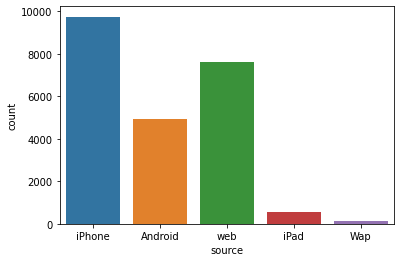

In [19]:
sns.countplot(data=taxi, x='source')

3) Проверьте, какой тип поездки *(icon)* встречался чаще всего

<AxesSubplot:xlabel='icon', ylabel='count'>

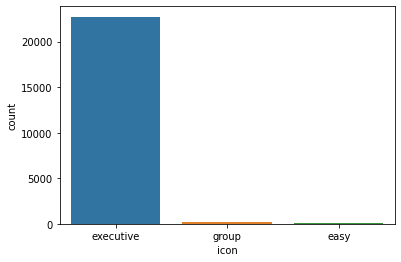

In [20]:
sns.countplot(data=taxi, x='icon')

4) Теперь попробуем построить более сложный график!

С помощью `sns.countplot` и параметра hue визуализируйте распределение переменной *end_state* (итоговое состояние заказа) в разбивке по платформам *(source)*.

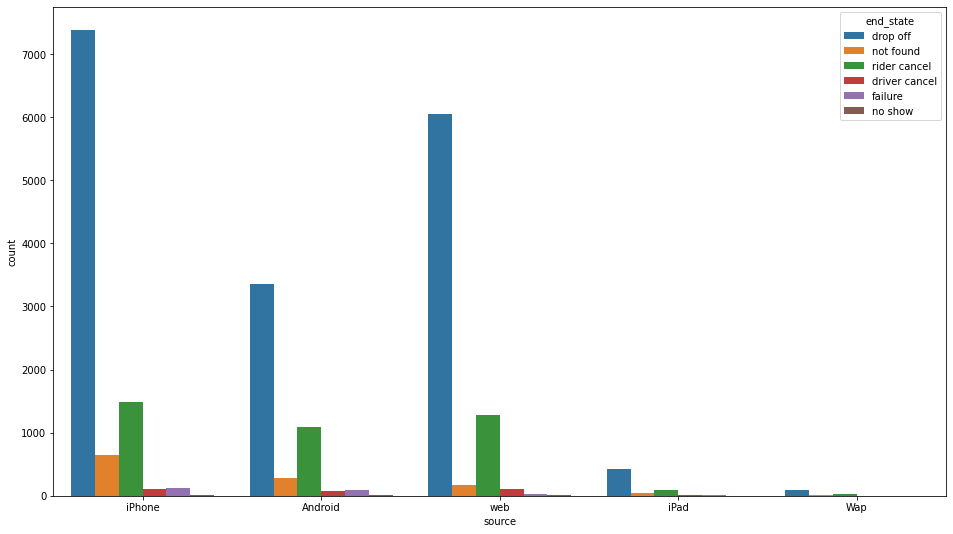

In [7]:
plt.figure(figsize=(16,9))
sns.countplot(data = taxi, x='source', hue='end_state')
plt.show()

5) Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:

- Посчитайте частоту встречаемости каждой из оценок
- Переведите в проценты и округлите до 2 знаков после точки (`.mul(100).round(2)`)
- Сбросьте индексы
- Переименуйте колонки в *driver_score* и *percentage*
- Отсортируйте по *driver_score* в порядке возрастания (от 0 до 5)
- Запишите результат в *driver_score_counts*

In [8]:
driver_score_counts = taxi['driver_score'].value_counts(normalize = True) \
    .mul(100) \
    .round(2) \
    .to_frame() \
    .reset_index() \
    .rename(columns = {'index' : 'driver_score', 'driver_score' : 'percentage'}) \
    .sort_values('driver_score')

6) Теперь строим график!

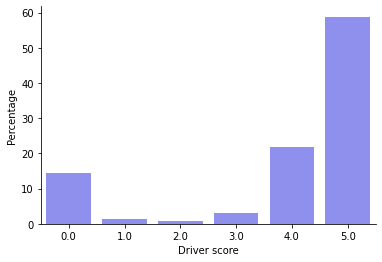

In [10]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

7) Проделайте аналогичные шаги для *rider_score* (оценок клиентов водителями), не забыв построить график.

In [72]:
rider_score_counts = taxi['rider_score'].value_counts(normalize = True) \
    .mul(100) \
    .round(2) \
    .to_frame() \
    .reset_index() \
    .rename(columns = {'index' : 'rider_score', 'rider_score' : 'percentage'}) \
    .sort_values('rider_score')

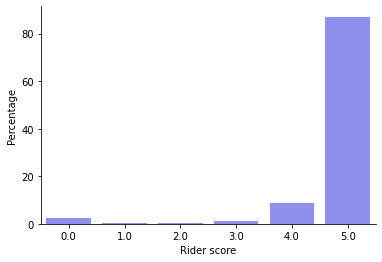

In [73]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

## Минипроект

In [22]:
logs = pd.read_csv('3_logs.csv')
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [23]:
user_data = pd.read_csv('3_user_data.csv')
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


1) Сколько уникальных значений принимает переменная *platform*?

In [24]:
logs['platform'].nunique()

3

2) Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (*client*) через запятую и пробел в порядке возрастания.

In [28]:
logs.query('success == True').groupby('client') \
    .agg({'success' : 'count'}) \
    .query('success == success.max()')

,success
client,
12179,41
28719,41
36165,41
52870,41
61468,41
61473,41
78349,41
82563,41
92584,41


3) С какой платформы осуществляется наибольшее количество успешных операций?

In [33]:
logs.query('success == True').groupby('platform') \
    .agg({'success' : 'count'}).idxmax()

success    phone
dtype: object

4) Какая платформа наиболее популярна среди премиумных клиентов?

In [35]:
full_data = user_data.merge(logs, on='client')
full_data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [36]:
full_data.query('premium == True') \
    .groupby('platform').agg({'client' : 'count'}).idxmax()

client    phone
dtype: object

5) Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

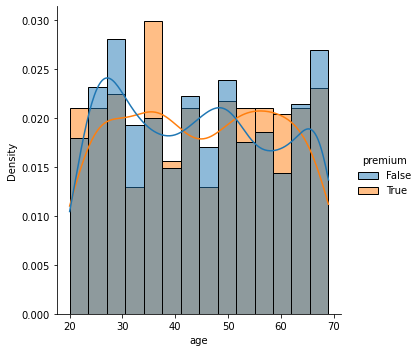

In [43]:
ax = sns.displot(data = full_data, x = 'age', hue = 'premium', 
                 kde=True, stat='density', 
                 common_norm = False, bins = 14)

6) Постройте график распределения числа успешных операций: 

*x* – число успешных операций,
*y* – число клиентов, совершивших столько успешных операций

In [48]:
client_success = logs.query('success == True') \
    .client.value_counts()
client_success

28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: client, Length: 2845, dtype: int64

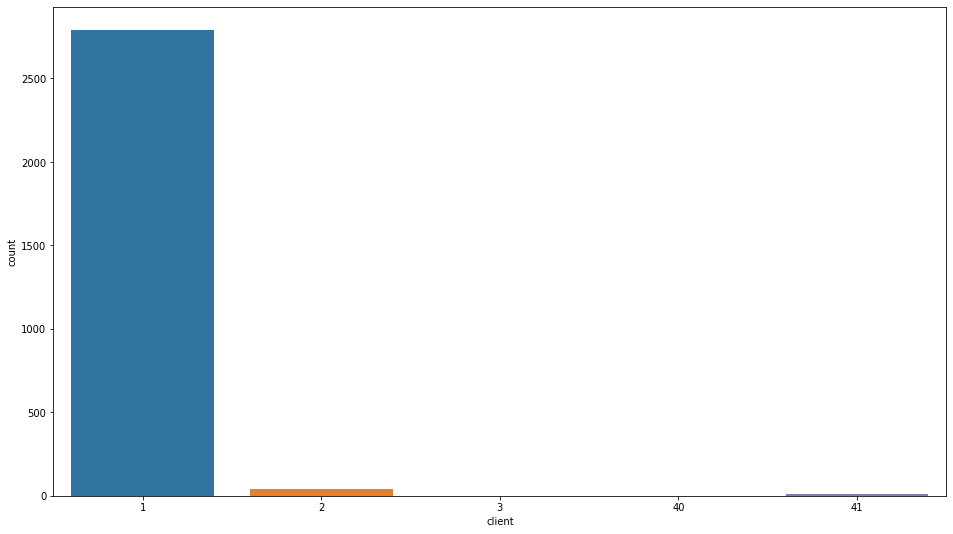

In [50]:
plt.figure(figsize=(16,9))
sns.countplot(x=client_success)
plt.show()

7) Визуализируйте число успешных операций, сделанных на платформе *computer*, в зависимости от возраста, используя `sns.countplot`. По оси *x* – возраст, *y* – число успешных операций. 

<AxesSubplot:xlabel='age', ylabel='count'>

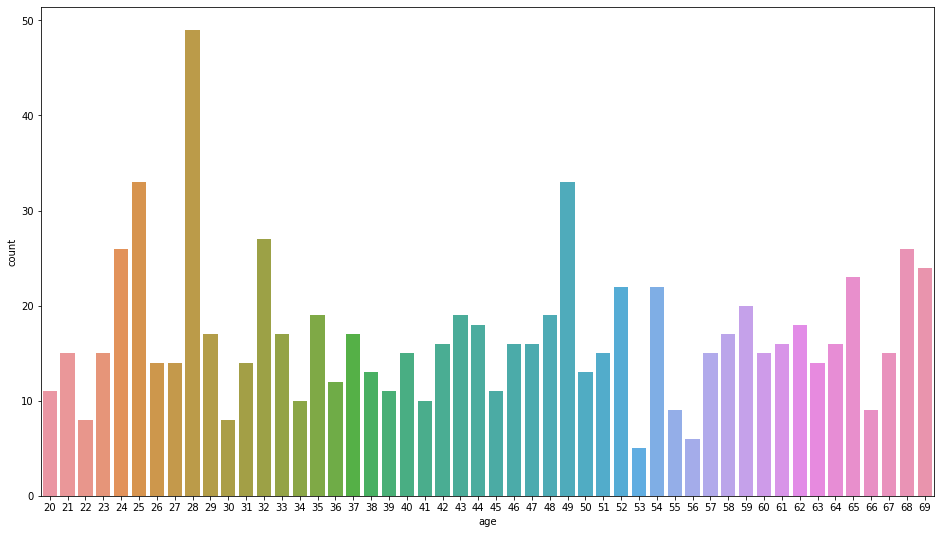

In [53]:
plt.figure(figsize=(16, 9))
sns.countplot(x='age', data = full_data.loc[(full_data.platform == 'computer') 
                                            & (full_data.success == True)])
